In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

In [7]:
ds = xr.open_dataset('/Users/lizdrenkard/external_data/Hollings_2020/primary_production_luo.nc')
ds.TIME

<xarray.DataArray 'TIME' (TIME: 12)>
array([cftime.DatetimeNoLeap(2007-01-16 12:00:00),
       cftime.DatetimeNoLeap(2007-02-15 00:00:00),
       cftime.DatetimeNoLeap(2007-03-16 12:00:00),
       cftime.DatetimeNoLeap(2007-04-16 00:00:00),
       cftime.DatetimeNoLeap(2007-05-16 12:00:00),
       cftime.DatetimeNoLeap(2007-06-16 00:00:00),
       cftime.DatetimeNoLeap(2007-07-16 12:00:00),
       cftime.DatetimeNoLeap(2007-08-16 12:00:00),
       cftime.DatetimeNoLeap(2007-09-16 00:00:00),
       cftime.DatetimeNoLeap(2007-10-16 12:00:00),
       cftime.DatetimeNoLeap(2007-11-16 00:00:00),
       cftime.DatetimeNoLeap(2007-12-16 12:00:00)], dtype=object)
Coordinates:
  * TIME     (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00
Attributes:
    time_origin:    01-JAN-1888 00:00:00
    axis:           T
    standard_name:  time
    bounds:         TIME_bnds

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


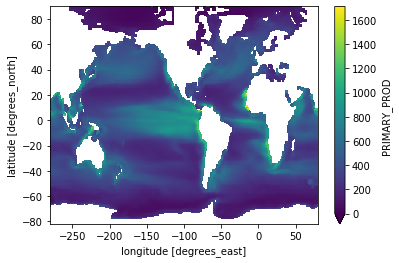

In [3]:
# plot of mean primary production over the whole year
ds.PRIMARY_PROD.mean(dim='TIME').plot(vmin=0)

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(3, 200, 360)


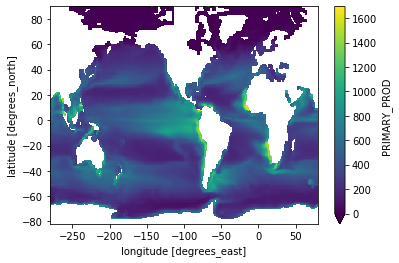

In [8]:
# this is jan-march mean primary production
ds.PRIMARY_PROD.isel(TIME=slice(0,3)).mean(dim='TIME').plot(vmin=0)
print(ds.PRIMARY_PROD.isel(TIME=slice(0,3)).shape)

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


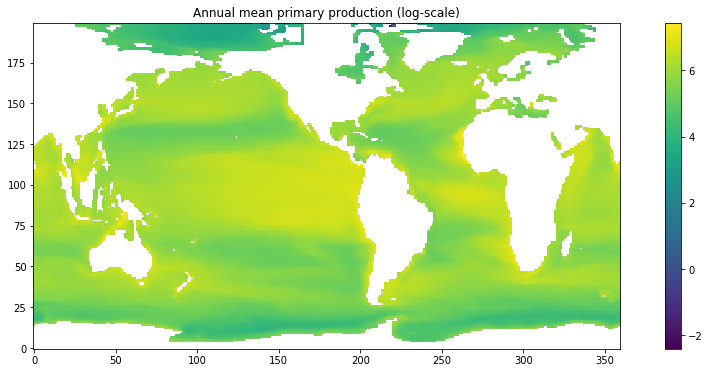

In [5]:
# plot of mean primary production on the log scale
plt.figure(figsize=(16,6))
field=np.log(ds.PRIMARY_PROD.mean(dim='TIME').values)
plt.imshow(field, origin='bottom')
plt.title('Annual mean primary production (log-scale)')
plt.colorbar()

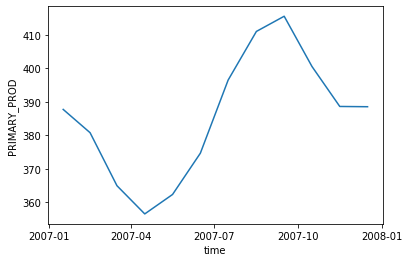

In [6]:
# plotting the primary production annual cycle
ds.PRIMARY_PROD.mean(dim=['YT_OCEAN','XT_OCEAN']).plot()